## Look at expression levels for the two transcripts w/ novel exons we see in the different populations

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [4]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

In [5]:
tids = ['transcript_347490', 'transcript_347547']

In [6]:
meta = load_meta()
meta = meta.loc[meta.merged_run_mode==True]
sample_d = dict([(entry.cell_line_id, entry['sample']) \
                 for ind, entry in meta.iterrows()])
    
    

f = expand(proc_cfg(config['lr']['kallisto']['quant']['merge_matrix_tpm_tsv'],od))[0]
df = pd.read_csv(f, sep='\t')
df.head()
df.columns = [d if d == 'transcript_id' else d.split('_')[0] for d in df.columns]
df.rename({'transcript_id':'tid'}, axis=1, inplace=True)
df.rename(sample_d, axis=1, inplace=True)

In [8]:
# melt 
df = df.melt(id_vars=['tid'], var_name='sample', value_name='counts')
df.head()

,tid,sample,counts
0,ENST00000413811.3,YRI5,0.000000
1,transcript_6675,YRI5,0.393218
2,transcript_6676,YRI5,0.956060
3,transcript_6684,YRI5,0.196609
4,transcript_6687,YRI5,0.000000


In [9]:
# merge
df = df.merge(meta[['sample', 'population']], 
              how='left',
              on='sample')

In [12]:
temp.head()

,tid,sample,counts,population
55052,transcript_347490,YRI5,0.000000,YRI
210927,transcript_347490,YRI6,0.000031,YRI
366802,transcript_347490,YRI7,0.000000,YRI
522677,transcript_347490,HAC1,0.000000,HAC
678552,transcript_347490,HAC2,0.000000,HAC


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  if __name__ == '__main__':
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


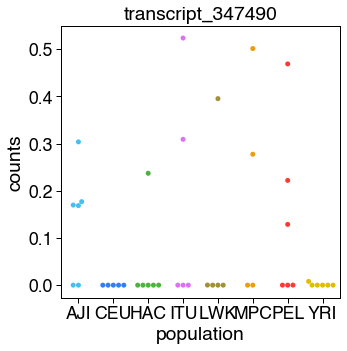

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  if __name__ == '__main__':


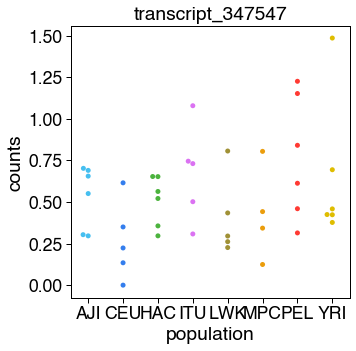

In [16]:
c_dict, order = get_population_colors()
init_plot_settings()
for t in tids:
    temp = df.loc[df.tid==t].copy(deep=True)
    ax = sns.swarmplot(temp, 
                y='counts', 
                x='population', 
                palette=c_dict, 
                order=order)
    ax.set(title=t)
    plt.show()
    